In [14]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("results/full_data.csv")
df.columns

Index(['P1_neighborhood_completeness', 'P2_neighborhood_completeness',
       'P1_passed_go_count', 'P2_passed_go_count', 'P1_properties_owned',
       'P2_properties_owned', 'P1_risk', 'P2_risk', 'P1_total_rent_paid',
       'P2_total_rent_paid', 'P1_wealth', 'P2_wealth', 'num_rounds', 'winner',
       'is_English', 'is_Random', 'is_Vickrey'],
      dtype='object')

In [26]:
features = ['P1_neighborhood_completeness', 'P2_neighborhood_completeness',
       'P1_passed_go_count', 'P2_passed_go_count', 'P1_properties_owned',
       'P2_properties_owned', 'P1_risk', 'P2_risk', 'P1_total_rent_paid',
       'P2_total_rent_paid', 'P1_wealth', 'P2_wealth', 'num_rounds',
       'is_English', 'is_Random', 'is_Vickrey']

In [27]:
df['winner']

0         2
1         1
2         1
3         2
4         2
         ..
134995    2
134996    1
134997    1
134998    1
134999    2
Name: winner, Length: 135000, dtype: int64

In [28]:
X = df[features]
y = df['winner']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [30]:
X_train

,P1_neighborhood_completeness,P2_neighborhood_completeness,P1_passed_go_count,P2_passed_go_count,P1_properties_owned,P2_properties_owned,P1_risk,P2_risk,P1_total_rent_paid,P2_total_rent_paid,P1_wealth,P2_wealth,num_rounds,is_English,is_Random,is_Vickrey
91006,0.0,0.0,2,2,8,4,1,-1,0,38,197.10,-8.68,16,0,0,1
84844,0.0,0.0,1,2,5,6,-1,1,8,18,-82.00,186.53,12,0,1,0
18238,1.0,0.0,3,1,9,3,1,-1,0,25,0.00,-6.06,17,1,0,0
96992,0.0,1.0,2,3,6,6,0,1,12,0,-3.41,44.24,18,0,0,1
19780,2.0,0.0,4,5,10,6,1,-1,24,52,-3.58,4.00,32,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129130,0.0,0.0,2,3,5,8,-1,1,32,49,-4.00,130.84,23,0,0,1
119906,0.0,1.0,4,5,8,6,1,1,34,60,-71.11,175.66,28,0,0,1
17730,1.0,0.0,2,1,7,5,1,-1,56,0,128.89,-72.00,17,1,0,0
28030,0.0,0.0,2,2,6,5,1,1,2,35,116.89,-35.00,14,1,0,0


In [34]:
from collections import Counter
Counter(y)

Counter({2: 68184, 1: 66816})

In [35]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13264
           2       1.00      1.00      1.00     13736

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



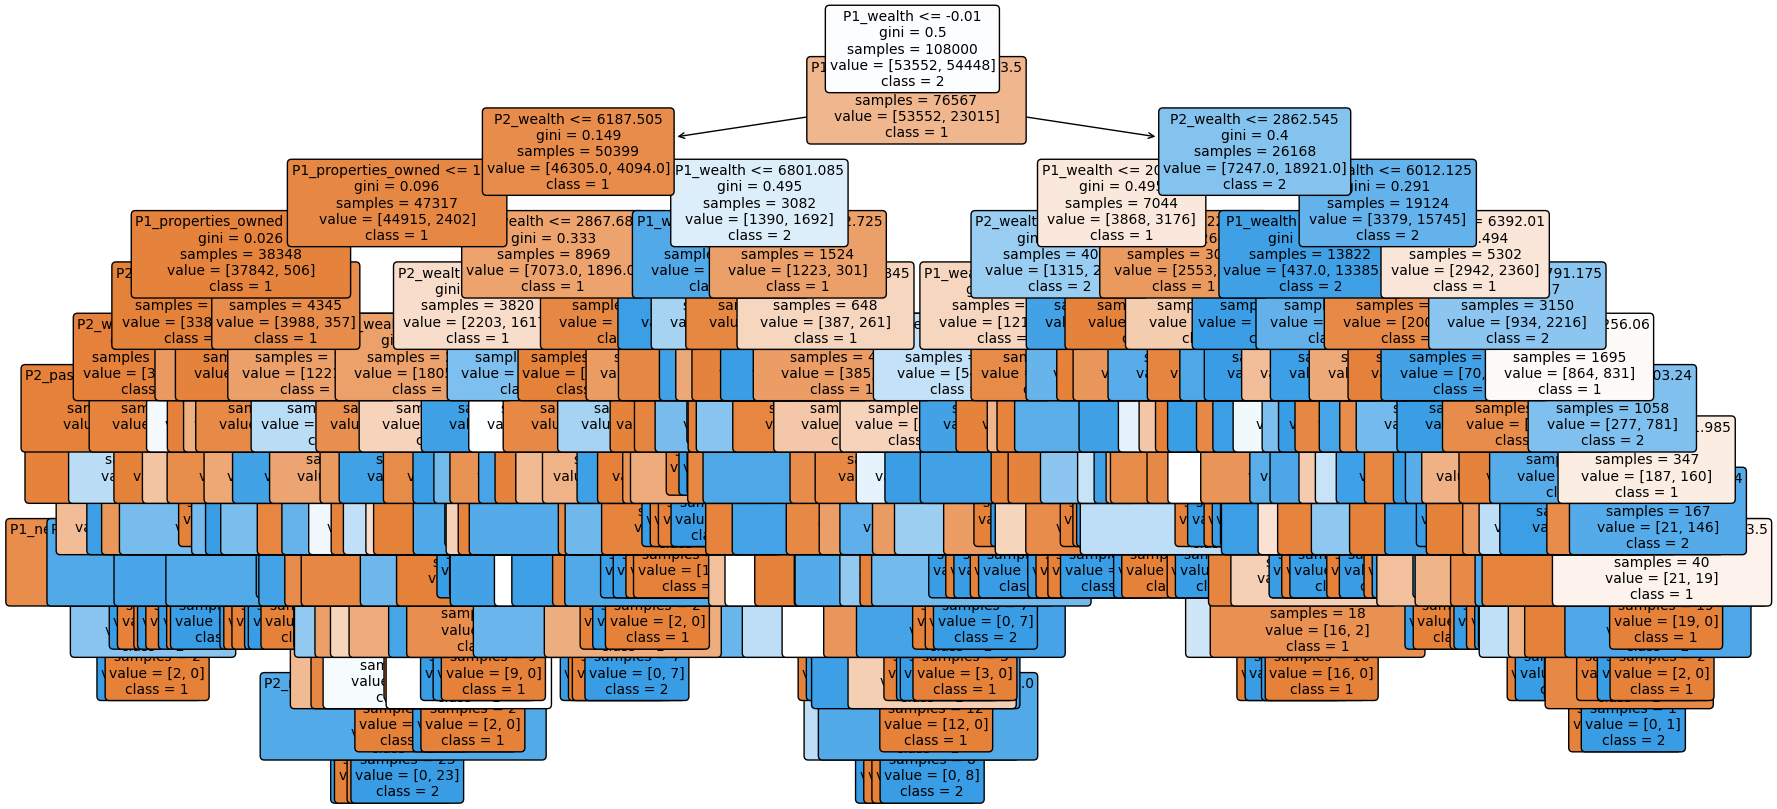

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming `clf` is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(clf, feature_names=X.columns, class_names=["1", "2"], filled=True, rounded=True, fontsize=10)
plt.show()